In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# Commented out IPython magic to ensure Python compatibility.
import seaborn as sns
# %matplotlib inline

print("Versión de librería sklearn: {}".format(sklearn.__version__))

Versión de librería sklearn: 0.22.2.post1


In [51]:
import numpy as np

In [81]:
mercado = pd.read_csv('/content/Cópia de vinotrabajo - Sheet1.csv', header=0)
tfm = pd.read_csv('/content/basededatostfmrestringido - Hoja 1.csv', header=0)


In [4]:
mercado.shape


(4292, 3)

In [5]:
tfm.shape

(33, 10)

In [54]:
mercado.columns

Index(['Marca', 'preciolitro', 'País'], dtype='object')

In [57]:
tfm.columns

Index(['País', 'valorexpo', 'porcexpoespaña', 'porceimpoespa', 'cantidad',
       'precio', 'porcenimpoomundial', 'crecimvalorcinc', 'Distancia',
       'concentracion', 'ease_doing', 'restaurantes', 'preciominor',
       'calidadvino'],
      dtype='object')

In [58]:
unificado = pd.merge(mercado, tfm, on='País')
unificado

,Marca,preciolitro,País,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,ease_doing,restaurantes,preciominor,calidadvino
0,Kloster Eberbach Spätburgunder rosé Rheingau Q...,10.65,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
1,Osborne Solaz Tempranillo 14.50 % vol 0.75 Liter,6.60,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
2,Finca los Príncipes Rioja Crianza 13.5 % vol 0...,7.97,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
3,Fetzer Eagle Peak Merlot 13.5 % vol. 0.75 Liter,9.32,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
4,Brumale Grecanico Inzolia Terre Siciliane IGT ...,5.99,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Nuits Saint Georges AC. 75cl. 2016,75.87,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2441,Grand Vin Son Mayol. 75cl. 2016,118.53,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2442,Bio Amoreira da Torre. 75cl. 2019,15.87,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2443,Ramiro's. 75cl. 2016,74.53,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57


In [12]:
unificado.columns

Index(['Marca', 'preciolitro', 'País', 'u1', 'u2', 'u3', 'x1', 'x3', 'x4',
       'x6', 'x7', 'x10'],
      dtype='object')

In [13]:
unificado.shape

(2555, 12)

In [59]:
unificado = unificado.drop(['Marca'],axis=1)
unificado

,preciolitro,País,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,ease_doing,restaurantes,preciominor,calidadvino
0,10.65,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
1,6.60,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
2,7.97,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
3,9.32,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
4,5.99,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,75.87,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2441,118.53,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2442,15.87,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
2443,74.53,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57


In [82]:
tfm['País']= tfm['País'].map( {'Alemania': 0, 'Austria': 1, 'Bélgica': 2, 'Italia': 3, 'Francia': 4, 'República Checa': 5, 'Suiza': 6, 'Suecia': 7, 'Portugal': 8, 'Checa':9, 'Austria':10 })#.astype(int)
tfm

,País,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,ease_doing,restaurantes,preciominor,calidadvino
0,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,22,60,12.6,89.90
1,4,290855,9.5,28.6,536123,543,2.7,9,3212,0.16,32,188,10.3,88.40
2,6,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,36,74,13.8,88.57
3,8,125514,4.1,75.7,257144,488,0.5,13,889,0.59,39,26,58.3,88.25
4,2,109994,3.6,10.3,49068,2242,3.1,4,1513,0.33,46,44,5.7,90.40
5,7,72597,2.4,11.0,23871,3041,2.1,3,3358,0.16,10,26,9.6,83.00
6,3,65576,2.1,18.6,112596,582,1.0,3,1026,0.53,58,100,10.2,88.56
7,5,15707,0.5,8.0,16986,925,0.7,9,1758,0.14,41,15,6.6,87.25
8,10,9219,0.3,6.0,2685,3434,0.7,6,1324,0.30,27,94,8.9,90.10


In [40]:
unificado.describe()

,País,u1,u2,x3,x6,x7,x10
count,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03,2555.000000,2555.000000
mean,4.906067,41121.631311,18032.766341,8.982544,1.175101e+06,28582.516634,65.594912
std,3.797304,48963.373066,22096.681759,2.078987,1.068908e+06,27037.950350,54.632558
min,0.000000,6894.000000,1272.000000,5.700000,2.506800e+05,8545.000000,15.000000
25%,1.000000,8763.000000,8238.000000,6.600000,4.450750e+05,10230.000000,26.000000
50%,5.000000,36080.000000,11135.000000,9.600000,5.330970e+05,11460.000000,44.000000
75%,7.000000,38330.000000,11317.000000,10.200000,2.003576e+06,60360.000000,100.000000
max,11.000000,213792.000000,84713.000000,13.800000,3.861123e+06,83020.000000,188.000000


In [18]:
def missing(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing(unificado)

unificado.isnull().sum()


preciolitro    0
País           0
u1             0
u2             0
u3             0
x1             0
x3             0
x4             0
x6             0
x7             0
x10            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

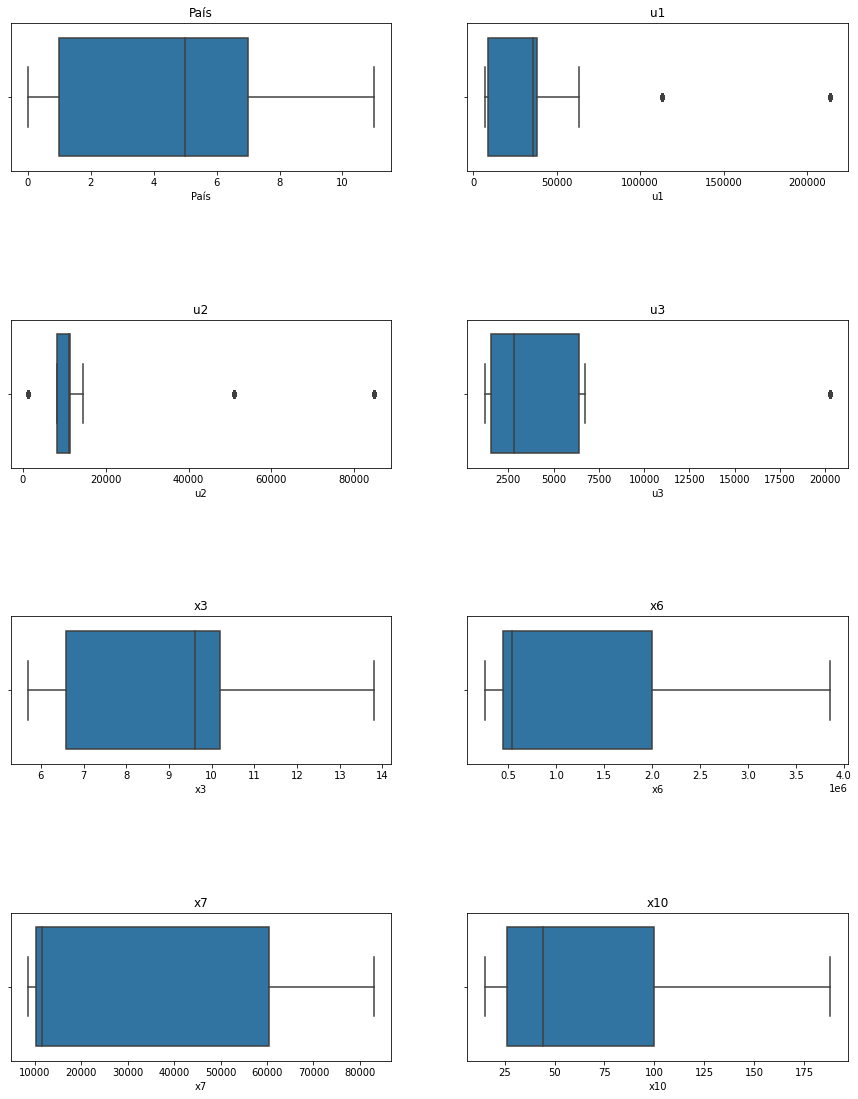

In [22]:
features=list(unificado.select_dtypes(exclude=['object']))
fig=plt.subplots(figsize=(15,30))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1),
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(unificado[j])
    plt.title(j)

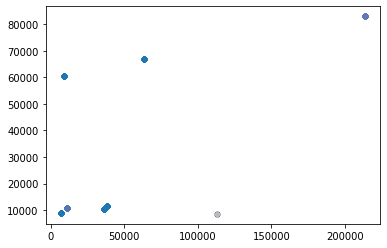

In [25]:
plt.scatter(unificado['u1'], unificado['x7'],alpha=0.002)

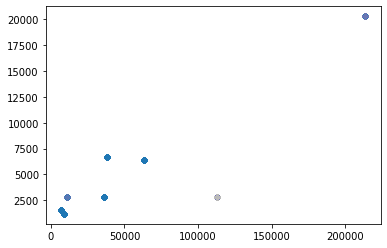

In [27]:
plt.scatter(unificado['u1'], unificado['u3'],alpha=0.002)

In [83]:
X = tfm.drop('País', axis=1)
Y = tfm.País

In [84]:
X_array = np.asarray(X)

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30)
X_val, X_test_test, Y_val, Y_test = train_test_split(X, Y, test_size=.30)
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_test)))

Datos iniciales		:	9
	- X_train	:	6
	- X_test	:	3


In [86]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=len(X_test))

In [87]:
print("Datos iniciales\t\t:\t{}\n\t- X_train\t:\t{}\n\t- X_val\t\t:\t{}\n\t- X_test\t:\t{}".format(len(X),len(X_train),len(X_val),len(X_test)))

Datos iniciales		:	9
	- X_train	:	3
	- X_val		:	3
	- X_test	:	3


In [88]:
from sklearn.linear_model import LinearRegression

In [ ]:
new['preciolitro'].isnull().values.any()

False

In [89]:
model = LinearRegression().fit(X_train,Y_train)

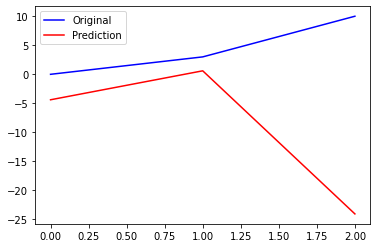

In [91]:
Y_predict = model.predict(X_test)
plt.plot(np.array(Y_test)[:9],'b')
plt.plot(Y_predict[:9],'r')
plt.legend(['Original', 'Prediction'])
plt.show()

In [92]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	1.0
Bondad del ajuste en Test:	-21.48095452669963


In [93]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0).fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037668656402204317, tolerance: 0.0018666666666666669
  positive)


In [94]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	0.9999998660196404
Bondad del ajuste en Test:	-1.5526711784715612


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [99]:
knn = KNeighborsClassifier()

In [ ]:
print("Bondad del ajuste en Train:\t{}".format(model.score(X_train,Y_train)))
print("Bondad del ajuste en Test:\t{}".format(model.score(X_test,Y_test)))

Bondad del ajuste en Train:	1.0
Bondad del ajuste en Test:	0.1295959228248999


In [108]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

In [109]:
model = svm.SVC().fit(X_train,Y_train)

In [110]:
Y_predict = model.predict(X_test)
print("Acc: {}".format(accuracy_score(Y_test, Y_predict)))

Acc: 0.0


In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print("Acc: {}".format(accuracy_score(Y_test, Y_predict)))

Acc: 0.0


In [112]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=2)
  clusters.fit(new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3.080961e+14
1,2,8.719097e+13
2,3,2.103182e+13
3,4,9.821657e+12
4,5,5.041399e+12
5,6,1.594200e+12
6,7,6.887775e+11
7,8,3.880102e+11
8,9,2.180537e+11


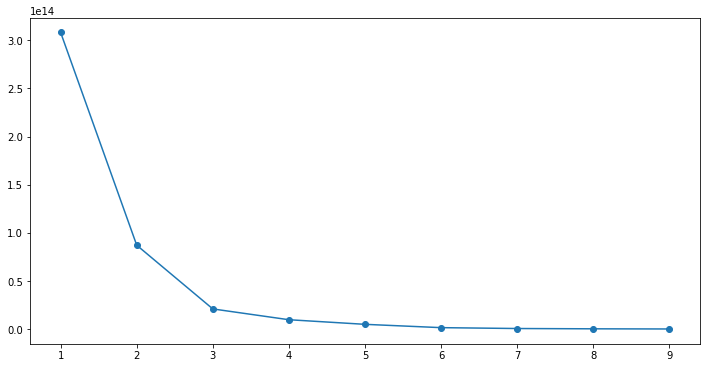

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

kmeans = KMeans(n_clusters=4, n_init = 20, random_state=4)
kmeans.fit(new)

centroids=kmeans.cluster_centers_


# creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [ ]:
model_clus5 = KMeans(n_clusters = 2, max_iter=50, verbose=1)
model_clus5.fit(new)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 87190972861717.39
start iteration
done sorting
end inner loop
Iteration 1, inertia 87190972861717.39
center shift 0.000000e+00 within tolerance 2.588434e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 123019618862415.78
start iteration
done sorting
end inner loop
Iteration 1, inertia 123019618862415.78
center shift 0.000000e+00 within tolerance 2.588434e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 123019618862415.78
start iteration
done sorting
end inner loop
Iteration 1, inertia 123019618862415.78
center shift 0.000000e+00 within tolerance 2.588434e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 123019618862415.78
start iteration
done sorting
end inner loop
Iteration 1, inertia 123019618862415.78
center shift 0.000000e+00 within tolerance 2.588434e+05
Initializa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=42)
clusters = kmeans.fit_predict(new)
df_k = new.copy(deep=True)
df_k['label'] = clusters

In [ ]:
df_k

,preciolitro,Pais,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,tarifa,ease_doing,label
0,10.650,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22,1
1,6.600,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22,1
2,7.970,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22,1
3,9.320,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22,1
4,5.990,0,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,21.537,10,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36,0
9152,16.200,10,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36,0
9153,27.000,10,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36,0
9154,17.937,10,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36,0


In [ ]:
 df_k[df_k.loc[:,'label']==0].mean()

preciolitro              25.434944
Pais                      5.234526
valorexpo             48785.437567
porcexpoespaña            1.591646
porceimpoespa             9.652236
cantidad              30631.145438
precio                 2500.235957
porcenimpoomundial        1.465725
crecimvalorcinc           5.396780
Distancia              2179.292129
concentracion             0.260572
tarifa                    0.929964
ease_doing               33.367979
label                     0.000000
dtype: float64

In [ ]:
 df_k[df_k.loc[:,'label']==1].mean()

preciolitro               12.513598
Pais                      10.886708
valorexpo             173019.459338
porcexpoespaña             5.649131
porceimpoespa             62.568817
cantidad              323934.771733
precio                   523.527201
porcenimpoomundial         1.307796
crecimvalorcinc           11.684240
Distancia               1468.067302
concentracion              0.479473
tarifa                     0.000000
ease_doing                36.718452
label                      1.000000
dtype: float64

In [ ]:
#Inicializamos PCA a una salida de 2 dimensiones:
PCA_Mapping = PCA(n_components=2).fit(X)

#Mapeamos los datos:
X_clust_PCA = PCA_Mapping.transform(X)

In [ ]:
#Inicializamos el algoritmo (5 clusters) y realizamos el clustering:
clustering_PCA = KMeans(n_clusters = 2, init='k-means++').fit(X_clust_PCA)

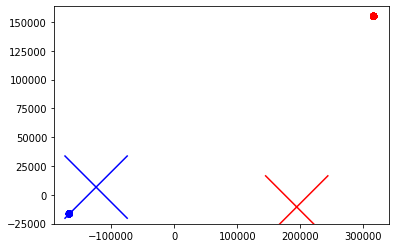

In [ ]:
#Importamos la librería gráfica:
import matplotlib.pyplot as plt

#Vector de colores:
colors = ['blue','red']

# #Mostramos los datos en crudo:
# plt.subplot(2,1,1)
# plt.scatter(X_clust_PCA[:100,0], X_clust_PCA[:100,1])
# plt.subplot(2,1,2)

#Mostramos los datos, siendo el color lo que representa su pertenencia a cada cluster:
plt.scatter(X_clust_PCA[:200,0], X_clust_PCA[:200,1], c=[colors[u] for u in clustering_PCA.labels_[:200]])

#Mostramos los centroides de cada uno de los clusters:
plt.scatter(clustering_PCA.cluster_centers_[:,0], clustering_PCA.cluster_centers_[:,1], c=colors, marker='x', s=4000)


plt.show()

In [114]:
target = tfm.pop('País')

In [117]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((tfm.values, target.values))

In [118]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [3.75263e+05 1.22000e+01 1.41000e+01 3.60815e+05 1.04000e+03 8.00000e+00
 3.00000e+00 2.29700e+03 2.50000e-01 2.20000e+01 6.00000e+01 1.26000e+01
 8.99000e+01], Target: 0
Features: [2.90855e+05 9.50000e+00 2.86000e+01 5.36123e+05 5.43000e+02 2.70000e+00
 9.00000e+00 3.21200e+03 1.60000e-01 3.20000e+01 1.88000e+02 1.03000e+01
 8.84000e+01], Target: 4
Features: [1.28808e+05 4.20000e+00 1.16000e+01 2.54990e+04 5.05100e+03 3.30000e+00
 4.00000e+00 1.15900e+03 2.80000e-01 3.60000e+01 7.40000e+01 1.38000e+01
 8.85700e+01], Target: 6
Features: [1.25514e+05 4.10000e+00 7.57000e+01 2.57144e+05 4.88000e+02 5.00000e-01
 1.30000e+01 8.89000e+02 5.90000e-01 3.90000e+01 2.60000e+01 5.83000e+01
 8.82500e+01], Target: 8
Features: [1.09994e+05 3.60000e+00 1.03000e+01 4.90680e+04 2.24200e+03 3.10000e+00
 4.00000e+00 1.51300e+03 3.30000e-01 4.60000e+01 4.40000e+01 5.70000e+00
 9.04000e+01], Target: 2


In [120]:
train_dataset = dataset.shuffle(len(tfm)).batch(64)

In [127]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [128]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [129]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 888ms/step - loss: 59413.3906 - accuracy: 0.1111
Epoch 2/15
1/1 [==============================] - 0s 3ms/step - loss: 58322.2695 - accuracy: 0.1111
Epoch 3/15
1/1 [==============================] - 0s 4ms/step - loss: 57238.7773 - accuracy: 0.1111
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 56163.0195 - accuracy: 0.1111
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 55095.1211 - accuracy: 0.1111
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 54035.2070 - accuracy: 0.1111
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 52983.3633 - accuracy: 0.1111
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 51939.7070 - accuracy: 0.1111
Epoch 9/15
1/1 [==============================] - 0s 3ms/step - loss: 50904.3281 - accuracy: 0.1111
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 49877.3008 - accuracy: 0.11

In [130]:
from sklearn.metrics import precision_score,recall_score,f1_score

KFold(n_splits=2, random_state=None, shuffle=False)
fold:  0
F1 score: 0.0
Acc: 0.0


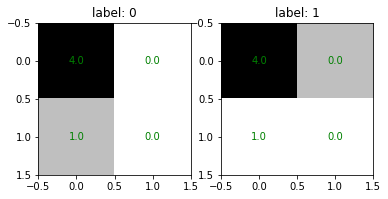

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


F1 calculado nan
fold:  1
F1 score: 0.0
Acc: 0.0


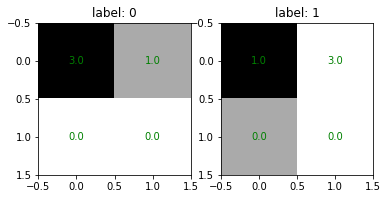

F1 calculado nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [134]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)
k=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    model = RandomForestClassifier().fit(X_train, y_train)
    Y_predict = model.predict(X_test)
    print('fold: ',k)
    print("F1 score: {}".format(f1_score(y_test, Y_predict,pos_label=1, average='weighted')))
    print("Acc: {}".format(accuracy_score(y_test, Y_predict)))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.imshow(multilabel_confusion_matrix(y_test, Y_predict)[0], cmap='binary')
    ax1.set_title('label: 0')
    for i in range(2):
        for j in range(2):
            text = ax1.text(j, i, multilabel_confusion_matrix(y_test, Y_predict)[0][i, j],
                       ha="center", va="center", color="g")
    ax2.imshow(multilabel_confusion_matrix(y_test, Y_predict)[2], cmap='binary')
    ax2.set_title('label: 1')
    for i in range(2):
        for j in range(2):
            text = ax2.text(j, i, multilabel_confusion_matrix(y_test, Y_predict)[1][i, j],
                       ha="center", va="center", color="g")
    plt.show()
    
    TN = multilabel_confusion_matrix(y_test, Y_predict)[1][0,0]
    FP = multilabel_confusion_matrix(y_test, Y_predict)[1][0,1]
    FN = multilabel_confusion_matrix(y_test, Y_predict)[1][1,0]
    TP = multilabel_confusion_matrix(y_test, Y_predict)[1][1,1]
    
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    f1_calculado = 2 * (precision * recall) / (precision + recall)
    print('F1 calculado', f1_calculado)
    
    k += 1

In [136]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [137]:
model = LinearRegression()

In [138]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
model = LinearRegression().fit(X, Y)

In [140]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [141]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)


intercept: 20.946374237535057
slope: [-4.70620513e-05 -1.11064163e-03 -5.94097849e-02  2.99213547e-05
  1.06162293e-03 -2.81598635e-03 -7.94145912e-03 -1.72205520e-03
 -1.24767615e-03 -1.48058965e-01 -5.46564668e-03  7.45970933e-02
 -8.55074941e-02]


In [142]:
y_pred = model.intercept_ + model.coef_ * X
print('predicted response:', y_pred, sep='\n')

predicted response:
   valorexpo  porcexpoespaña  ...  preciominor  calidadvino
0   3.285728       20.932824  ...    21.886298    13.259251
1   7.258141       20.935823  ...    21.714724    13.387512
2  14.884406       20.941710  ...    21.975814    13.372975
3  15.039428       20.941821  ...    25.295385    13.400338
4  15.769831       20.942376  ...    21.371578    13.216497
5  17.529811       20.943709  ...    21.662506    13.849252
6  17.860233       20.944042  ...    21.707265    13.373831
7  20.207171       20.945819  ...    21.438715    13.485845
8  20.512509       20.946041  ...    21.610288    13.242149

[9 rows x 13 columns]


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
country = pd.read_csv('/content/vinotrabajo - Sheet1 (9).csv', header=0)

In [ ]:
country_checa = country[country['Pais'] == 'República Checa']
country_checa.describe()

,preciolitro
count,478.000000
mean,13.767335
std,9.817388
min,2.531940
25%,8.101600
50%,11.400000
75%,15.184800
max,86.070000


In [ ]:
country_alem = country[country['Pais'] == 'Alemania']
country_alem.describe()

,preciolitro
count,150.000000
mean,25.825600
std,46.634125
min,3.180000
25%,7.990000
50%,11.985000
75%,21.290000
max,332.000000


In [ ]:
country_swi = country[country['Pais'] == 'Suiza']
country_swi.describe()

,preciolitro
count,281.000000
mean,24.277804
std,48.993665
min,3.105000
25%,11.943000
50%,15.597000
75%,21.537000
max,690.003000


In [ ]:
country_net = country[country['Pais'] == 'Holanda']
country_net.describe()

,preciolitro
count,346.000000
mean,7.921272
std,8.587817
min,1.990000
25%,4.390000
50%,6.650000
75%,7.960000
max,76.930000


In [ ]:
country_fra = country[country['Pais'] == 'Francia']
country_fra.describe()

,preciolitro
count,798.000000
mean,10.528358
std,13.123843
min,0.450000
25%,4.790000
50%,6.795000
75%,9.730000
max,116.660000


In [ ]:
country_pt = country[country['Pais'] == 'Portugal']
country_pt.describe()

,preciolitro
count,2618.000000
mean,12.356005
std,20.624717
min,0.530000
25%,3.990000
50%,5.990000
75%,11.990000
max,206.670000


In [ ]:
country_bel = country[country['Pais'] == 'Bélgica']
country_bel.describe()

,preciolitro
count,496.000000
mean,7.633952
std,3.271672
min,1.550000
25%,5.490000
50%,6.990000
75%,8.990000
max,16.990000


In [ ]:
country_swe = country[country['Pais'] == 'Suecia']
country_swe.describe()

,preciolitro
count,347.000000
mean,32.670559
std,42.822005
min,5.576670
25%,13.068000
50%,22.307670
75%,36.893835
max,514.668330


In [ ]:
country_dk = country[country['Pais'] == 'Dinamarca']
country_dk.describe()

,preciolitro
count,267.000000
mean,10.102860
std,5.406162
min,2.600000
25%,6.370000
50%,8.450000
75%,12.870000
max,29.185000


In [ ]:
country_irl = country[country['Pais'] == 'Irlanda']
country_irl.describe()

,preciolitro
count,221.000000
mean,14.734163
std,5.094880
min,4.840000
25%,11.330000
50%,13.330000
75%,16.000000
max,38.030000


In [ ]:
country_pol = country[country['Pais'] == 'Polonia']
country_pol.describe()

,preciolitro
count,583.000000
mean,24.792334
std,26.511549
min,0.000000
25%,10.788800
50%,17.012600
75%,26.516600
max,234.372600


In [ ]:
country_no = country[country['Pais'] == 'Noruega']
country_no.describe()

,preciolitro
count,295.000000
mean,52.821765
std,59.120378
min,12.206700
25%,26.396865
50%,40.260330
75%,59.393565
max,628.716330


In [ ]:
country_che = country[country['Pais'] == 'República Checa']
country_che.describe()

,preciolitro
count,478.000000
mean,13.767335
std,9.817388
min,2.531940
25%,8.101600
50%,11.400000
75%,15.184800
max,86.070000


In [ ]:
country_it = country[country['Pais'] == 'Italia']
country_it.describe()

,preciolitro
count,716.000000
mean,9.124106
std,10.188791
min,0.650000
25%,4.650000
50%,6.650000
75%,9.577500
max,99.000000


In [ ]:
country_aus = country[country['Pais'] == 'Austria']
country_aus.describe()

,preciolitro
count,1560.000000
mean,43.840821
std,138.579208
min,1.000000
25%,9.320000
50%,14.650000
75%,30.022500
max,1720.000000


In [ ]:
country_hung = country[country['Pais'] == 'Hungria']
country_hung.describe()

,preciolitro
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
mapa = pd.read_csv('/content/basededatosexpo - Hoja 1.csv', header=0)

In [ ]:
new = pd.merge(country, mapa, on='Pais')
new

,Marca,preciolitro,Pais,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,tarifa,ease_doing
0,Kloster Eberbach Spätburgunder rosé Rheingau Q...,10.650,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22
1,Osborne Solaz Tempranillo 14.50 % vol 0.75 Liter,6.600,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22
2,Finca los Príncipes Rioja Crianza 13.5 % vol 0...,7.970,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22
3,Fetzer Eagle Peak Merlot 13.5 % vol. 0.75 Liter,9.320,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22
4,Brumale Grecanico Inzolia Terre Siciliane IGT ...,5.990,Alemania,375263,12.2,14.1,360815,1040,8.0,3,2297,0.25,0.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,Naturaplan Organic Valais AOC Rebbio Jean-René...,21.537,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36
9152,Zürich AOC Goldküste Pinot Noir Cabernet,16.200,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36
9153,Genève AOC Merlot Barrique,27.000,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36
9154,Amarone della Valpolicella Rocca Alata DOC,17.937,Suiza,128808,4.2,11.6,25499,5051,3.3,4,1159,0.28,18.5,36


In [ ]:
country_checa = new[new['Pais'] == 'República Checa']
country_checa.describe()

,preciolitro,valorexpo,porcexpoespaña,porceimpoespa,cantidad,precio,porcenimpoomundial,crecimvalorcinc,Distancia,concentracion,tarifa,ease_doing
count,478.000000,478.0,478.0,478.0,478.0,478.0,4.780000e+02,478.0,478.0,4.780000e+02,478.0,478.0
mean,13.767335,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0
std,9.817388,0.0,0.0,0.0,0.0,0.0,6.223763e-15,0.0,0.0,4.723391e-16,0.0,0.0
min,2.531940,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0
25%,8.101600,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0
50%,11.400000,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0
75%,15.184800,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0
max,86.070000,15707.0,0.5,8.0,16986.0,925.0,7.000000e-01,9.0,1758.0,1.400000e-01,0.0,41.0


In [ ]:
country_no.head()

,Marca,preciolitro,Pais
4554,Lamblin Petit Chablis 2016,26.38647,Noruega
4555,Charly Nicolle Chablis Per Aspera,30.34647,Noruega
4556,Georg Breuer Nonnenberg Riesling 2018,87.63480,Noruega
4557,Barone di Serramarrocco Chardonnay,26.32113,Noruega
4558,Le Dada de Rouillac 2014,26.40033,Noruega


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
country = pd.read_csv('/content/novotfmvino - Hoja 1 (1).csv', header=0, decimal=',')

In [ ]:
country.head()

,País,valorexportado,porcentajeenlasexpoespañaenelpai,cantidad,distanciageo,concentracion,easy,rankingvino,numeroperaciones,población,pib,precio retail,restaurantesespañol,restaurantes
0,Reino Unido,266029,9.4,94668.0,0.000792,0.18,8,91.58,16782,66650,2829000,NaN,2495.0,227958.0
1,Estados Unidos,246950,5.7,44991.0,0.000173,0.21,6,88.56,32900,328200,21430000,NaN,7472.0,281499.0
2,Alemania,213792,12.6,84713.0,0.000167,0.27,22,89.85,20276,83020,3861000,31.108434,133.0,14177.0
3,Suiza,112855,13.8,14561.0,0.000802,0.25,36,88.57,2820,8545,703000,29.240964,NaN,NaN
4,Países Bajos,98705,9.0,40163.0,0.000675,0.13,42,NaN,11413,17280,907100,9.542169,100.0,16904.0


In [ ]:
country.corr()

,valorexportado,porcentajeenlasexpoespañaenelpai,cantidad,distanciageo,concentracion,easy,rankingvino,numeroperaciones,población,pib,precio retail,restaurantesespañol,restaurantes
valorexportado,1.000000,-0.068473,0.794212,0.222118,-0.162329,-0.336428,0.445153,0.921107,0.060963,0.649539,-0.021174,0.583342,0.535157
porcentajeenlasexpoespañaenelpai,-0.068473,1.000000,0.013296,0.018666,0.143328,-0.180884,-0.058959,-0.084902,-0.067701,-0.077054,-0.120307,-0.140214,-0.230336
cantidad,0.794212,0.013296,1.000000,0.598270,-0.066488,-0.275698,0.433169,0.694704,-0.008291,0.345812,-0.242299,0.232020,0.272730
distanciageo,0.222118,0.018666,0.598270,1.000000,-0.131856,-0.216735,0.302191,0.108949,-0.176813,-0.086328,-0.394144,-0.159697,0.021884
concentracion,-0.162329,0.143328,-0.066488,-0.131856,1.000000,0.458618,-0.098062,-0.170464,-0.097758,-0.085228,0.040008,0.100990,-0.127546
easy,-0.336428,-0.180884,-0.275698,-0.216735,0.458618,1.000000,-0.506139,-0.334611,0.109191,-0.195173,-0.562837,-0.059513,-0.277890
rankingvino,0.445153,-0.058959,0.433169,0.302191,-0.098062,-0.506139,1.000000,0.348891,0.219950,0.189965,0.750275,0.167833,0.417583
numeroperaciones,0.921107,-0.084902,0.694704,0.108949,-0.170464,-0.334611,0.348891,1.000000,0.097545,0.823702,-0.114385,0.693752,0.533218
población,0.060963,-0.067701,-0.008291,-0.176813,-0.097758,0.109191,0.219950,0.097545,1.000000,0.308482,-0.173361,0.656001,0.390006
pib,0.649539,-0.077054,0.345812,-0.086328,-0.085228,-0.195173,0.189965,0.823702,0.308482,1.000000,-0.108822,0.862414,0.592149


In [ ]:
import seaborn as sns


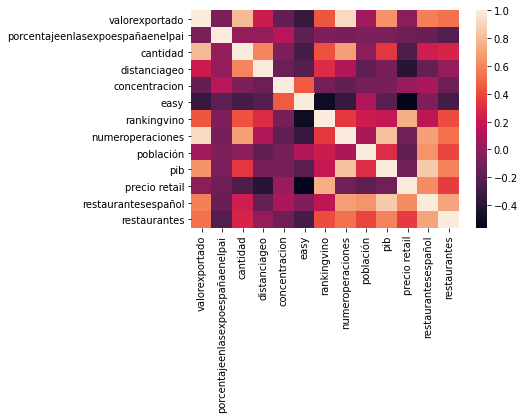

In [ ]:
import seaborn as sns
corr = country.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)